# Basics

In this workbook we'll try to walk through some basics of the linear regression models shown in the tutorial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
workbook_data = pickle.load(open('data/workbook_0.p', 'rb'))
x, y, ye = workbook_data['x'], workbook_data['y'], workbook_data['ye']

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'Fake Data')]

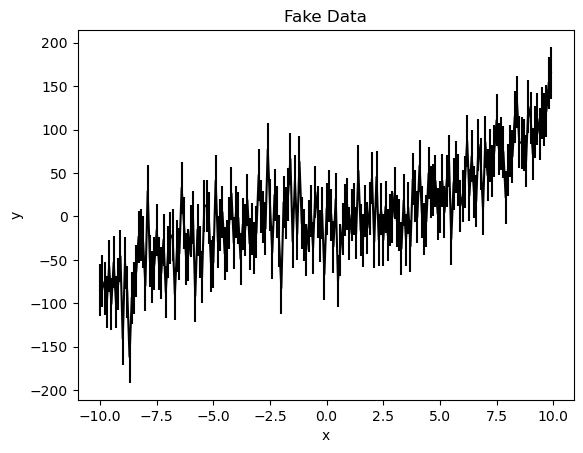

In [3]:
fig, ax = plt.subplots()
ax.errorbar(x, y, ye, color='k')
ax.set(xlabel='x', ylabel='y', title='Fake Data')

## Step 1: Create a design matrix

Create a design matrix for the data above. The design matrix should be a **3rd order polynomial**. The order of the vectors in the design matrix should be $x^0$, $x^1$, ... , $x^n$.

Overwrite `A` below to be your design matrix.

In [14]:
m = 4 # the order of our polynomial
A = np.vstack([x**idx for idx in range(m)]).T

In [16]:
assert isinstance(A, np.ndarray)
assert np.all([np.allclose(a, x**idx) for idx, a in enumerate(A.T)])

## Step 2: Find the best fitting weights
Use the Weighted Least Squares equation to find the mean best fitting weights. 

Overwrite `w` below to be your mean best fitting weights. 

In [25]:
w = np.linalg.solve(A.T.dot(A), A.T.dot(y))

In [26]:
assert np.isclose(w, workbook_data['true_w'], atol=3*np.linalg.inv(A.T.dot(A/ye[:, None]**2)).diagonal()**0.5).all()


## Step 3: Find the errors on the best fitting weights

Calculate the errors on the best fitting weights (i.e. the standard deviation of the distribution of the best fitting weights.)

Overwrite `w_err` below with your best fitting weights 

In [27]:
sigma_w_inv = A.T.dot(A/ye[:, None]**2)
w_err = np.linalg.inv(sigma_w_inv).diagonal()

In [29]:
w_err

array([1.01266878e+01, 8.43792192e-01, 5.06756412e-03, 1.96943924e-04])

In [28]:
assert len(w_err) == len(w)
assert np.allclose(w_err, np.asarray([3.18224571, 0.91858162, 0.07118683, 0.01403367]), atol=0.3)

AssertionError: 

## Step 4: Calculate the model outside of the data bounds

Use your best fitting weights to calculate the mean model at position $x = 11$.

Overwrite `y_11` below with your answer. 

In [30]:
A_11 = np.vstack([11**idx for idx in range(m)]).T
y_11 = A_11.dot(w)

In [32]:
print(y_11)

[181.83203226]


In [31]:
assert y_11 == 181.83203225825352

AssertionError: 

## Step 5: Estimate the error on the model at new point

Use `np.random.multivariate_normal` to estimate the model error at  $x = 11$.

Overwrite `y_11_err` below with your answer.

In [12]:
y_11_err = None

In [13]:
assert np.isclose(y_11_err, 12, atol=2)